In [1]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.python.client import device_lib
from sklearn.model_selection import train_test_split


In [2]:
import os
import cv2 as cv

In [3]:
data = r"C:\Users\Sparsh Mahajan\Downloads\archive (3)"
img = os.path.join(data , 'Images')
text = os.path.join(data  , 'captions.txt')
op = "../working/Image/"

all_imgs = glob.glob(img+ '/*.jpg',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))

The total images present in the dataset: 8091


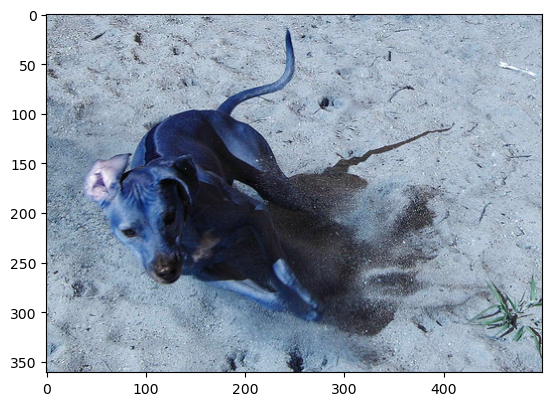

In [4]:
plt.imshow(cv.imread(all_imgs[108]))
plt.show()

In [5]:
all_imgs

['C:\\Users\\Sparsh Mahajan\\Downloads\\archive (3)\\Images\\1000268201_693b08cb0e.jpg',
 'C:\\Users\\Sparsh Mahajan\\Downloads\\archive (3)\\Images\\1001773457_577c3a7d70.jpg',
 'C:\\Users\\Sparsh Mahajan\\Downloads\\archive (3)\\Images\\1002674143_1b742ab4b8.jpg',
 'C:\\Users\\Sparsh Mahajan\\Downloads\\archive (3)\\Images\\1003163366_44323f5815.jpg',
 'C:\\Users\\Sparsh Mahajan\\Downloads\\archive (3)\\Images\\1007129816_e794419615.jpg',
 'C:\\Users\\Sparsh Mahajan\\Downloads\\archive (3)\\Images\\1007320043_627395c3d8.jpg',
 'C:\\Users\\Sparsh Mahajan\\Downloads\\archive (3)\\Images\\1009434119_febe49276a.jpg',
 'C:\\Users\\Sparsh Mahajan\\Downloads\\archive (3)\\Images\\1012212859_01547e3f17.jpg',
 'C:\\Users\\Sparsh Mahajan\\Downloads\\archive (3)\\Images\\1015118661_980735411b.jpg',
 'C:\\Users\\Sparsh Mahajan\\Downloads\\archive (3)\\Images\\1015584366_dfcec3c85a.jpg',
 'C:\\Users\\Sparsh Mahajan\\Downloads\\archive (3)\\Images\\101654506_8eb26cfb60.jpg',
 'C:\\Users\\Sparsh Ma

In [6]:
captions=[]
with open(text,'r') as f:
        captions=list(filter(None,(line.rstrip() for line in f)))

    
print(captions[:5])

['image,caption', '1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .', '1000268201_693b08cb0e.jpg,A girl going into a wooden building .', '1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .', '1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .']


In [7]:
import pandas as pd

In [8]:
ids=[]
caption = []
for txt in captions[1:] :
    caption.append(txt.split(',')[1])
    ids.append(txt.split(',')[0]) 

In [9]:
caption[0]

'A child in a pink dress is climbing up a set of stairs in an entry way .'

In [10]:
df=pd.DataFrame(list(zip(ids , all_imgs , caption)), columns =['ID','Path', 'Captions'])

In [11]:
df

,ID,Path,Captions
0,1000268201_693b08cb0e.jpg,C:\Users\Sparsh Mahajan\Downloads\archive (3)\...,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,C:\Users\Sparsh Mahajan\Downloads\archive (3)\...,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,C:\Users\Sparsh Mahajan\Downloads\archive (3)\...,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,C:\Users\Sparsh Mahajan\Downloads\archive (3)\...,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,C:\Users\Sparsh Mahajan\Downloads\archive (3)\...,A little girl in a pink dress going into a woo...
...,...,...,...
8086,2355880294_8f78a6fea6.jpg,C:\Users\Sparsh Mahajan\Downloads\archive (3)\...,Two men are climbing a rock face at a waterfall .
8087,2355880294_8f78a6fea6.jpg,C:\Users\Sparsh Mahajan\Downloads\archive (3)\...,Two men climb up a waterfall using a rope whil...
8088,2355880294_8f78a6fea6.jpg,C:\Users\Sparsh Mahajan\Downloads\archive (3)\...,Two men hanging from ropes over a waterfall .
8089,2355880294_8f78a6fea6.jpg,C:\Users\Sparsh Mahajan\Downloads\archive (3)\...,Two men tethered by ropes climbing a hill wher...


In [12]:
df["Captions"]=df["Captions"].apply(lambda x:'<start> '+x+' <end>')

In [13]:
df

,ID,Path,Captions
0,1000268201_693b08cb0e.jpg,C:\Users\Sparsh Mahajan\Downloads\archive (3)\...,<start> A child in a pink dress is climbing up...
1,1000268201_693b08cb0e.jpg,C:\Users\Sparsh Mahajan\Downloads\archive (3)\...,<start> A girl going into a wooden building . ...
2,1000268201_693b08cb0e.jpg,C:\Users\Sparsh Mahajan\Downloads\archive (3)\...,<start> A little girl climbing into a wooden p...
3,1000268201_693b08cb0e.jpg,C:\Users\Sparsh Mahajan\Downloads\archive (3)\...,<start> A little girl climbing the stairs to h...
4,1000268201_693b08cb0e.jpg,C:\Users\Sparsh Mahajan\Downloads\archive (3)\...,<start> A little girl in a pink dress going in...
...,...,...,...
8086,2355880294_8f78a6fea6.jpg,C:\Users\Sparsh Mahajan\Downloads\archive (3)\...,<start> Two men are climbing a rock face at a ...
8087,2355880294_8f78a6fea6.jpg,C:\Users\Sparsh Mahajan\Downloads\archive (3)\...,<start> Two men climb up a waterfall using a r...
8088,2355880294_8f78a6fea6.jpg,C:\Users\Sparsh Mahajan\Downloads\archive (3)\...,<start> Two men hanging from ropes over a wate...
8089,2355880294_8f78a6fea6.jpg,C:\Users\Sparsh Mahajan\Downloads\archive (3)\...,<start> Two men tethered by ropes climbing a h...


In [14]:
import nltk

In [15]:

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [16]:
t= ' '.join(caption)

In [17]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to C:\Users\Sparsh
[nltk_data]     Mahajan\anaconda3\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [18]:
tokenized = word_tokenize(t)

In [19]:
tokenized

['A',
 'child',
 'in',
 'a',
 'pink',
 'dress',
 'is',
 'climbing',
 'up',
 'a',
 'set',
 'of',
 'stairs',
 'in',
 'an',
 'entry',
 'way',
 '.',
 'A',
 'girl',
 'going',
 'into',
 'a',
 'wooden',
 'building',
 '.',
 'A',
 'little',
 'girl',
 'climbing',
 'into',
 'a',
 'wooden',
 'playhouse',
 '.',
 'A',
 'little',
 'girl',
 'climbing',
 'the',
 'stairs',
 'to',
 'her',
 'playhouse',
 '.',
 'A',
 'little',
 'girl',
 'in',
 'a',
 'pink',
 'dress',
 'going',
 'into',
 'a',
 'wooden',
 'cabin',
 '.',
 'A',
 'black',
 'dog',
 'and',
 'a',
 'spotted',
 'dog',
 'are',
 'fighting',
 'A',
 'black',
 'dog',
 'and',
 'a',
 'tri-colored',
 'dog',
 'playing',
 'with',
 'each',
 'other',
 'on',
 'the',
 'road',
 '.',
 'A',
 'black',
 'dog',
 'and',
 'a',
 'white',
 'dog',
 'with',
 'brown',
 'spots',
 'are',
 'staring',
 'at',
 'each',
 'other',
 'in',
 'the',
 'street',
 '.',
 'Two',
 'dogs',
 'of',
 'different',
 'breeds',
 'looking',
 'at',
 'each',
 'other',
 'on',
 'the',
 'road',
 '.',
 'Two'

In [20]:
fq=FreqDist(t.lower() for t in tokenized)

In [21]:
fq.most_common(30)

[('a', 61430),
 ('.', 34287),
 ('in', 18182),
 ('the', 17676),
 ('on', 10367),
 ('is', 9069),
 ('and', 8057),
 ('dog', 7956),
 ('with', 7308),
 ('man', 7164),
 ('of', 6496),
 ('two', 5546),
 ('white', 3710),
 ('black', 3627),
 ('boy', 3534),
 ('are', 3365),
 ('woman', 3320),
 ('girl', 3284),
 ('to', 3005),
 ('wearing', 2917),
 ('people', 2837),
 ('at', 2820),
 ('``', 2742),
 ('water', 2676),
 ('young', 2610),
 ('red', 2553),
 ('brown', 2471),
 ('an', 2358),
 ('his', 2255),
 ('blue', 2125)]

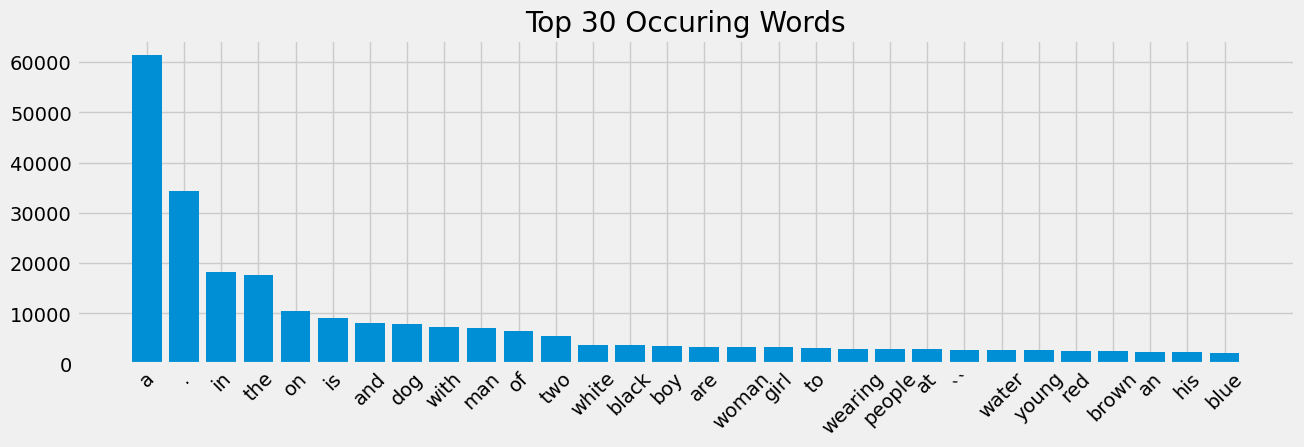

In [22]:
def plot_top_words(word_counter):
    plt.style.use('fivethirtyeight')
    # plt.title('Most Commonly Used NOUNs')
    plt.figure(figsize=(14,4))
    plt.xticks(rotation=45)
    # plt.bar(*zip(*word_counter.most_common(30)))
    plt.bar(*zip(*word_counter))
    plt.title("Top 30 Occuring Words")
    plt.show()

plot_top_words(fq.most_common(30))

In [23]:
top_word_count = 5000

filter_chars = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~ '
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_word_count,
                                                  oov_token="<unk>",
                                                  filters=filter_chars)
tokenizer.fit_on_texts(df["Captions"])
train_seqs = tokenizer.texts_to_sequences(df["Captions"])
print(train_seqs[:5])
print(df["Captions"])
print(f'OOV Token: {tokenizer.oov_token}')

[[3, 2, 40, 5, 2, 85, 179, 8, 77, 45, 2, 496, 13, 518, 5, 29, 2250, 413, 4], [3, 2, 17, 354, 55, 2, 183, 158, 4], [3, 2, 33, 17, 77, 55, 2, 183, 1678, 4], [3, 2, 33, 17, 77, 6, 518, 19, 61, 1678, 4], [3, 2, 33, 17, 5, 2, 85, 179, 354, 55, 2, 183, 1679, 4]]
0       <start> A child in a pink dress is climbing up...
1       <start> A girl going into a wooden building . ...
2       <start> A little girl climbing into a wooden p...
3       <start> A little girl climbing the stairs to h...
4       <start> A little girl in a pink dress going in...
                              ...                        
8086    <start> Two men are climbing a rock face at a ...
8087    <start> Two men climb up a waterfall using a r...
8088    <start> Two men hanging from ropes over a wate...
8089    <start> Two men tethered by ropes climbing a h...
8090    <start> A Arabian dressed lady leans backwards...
Name: Captions, Length: 8091, dtype: object
OOV Token: <unk>


In [24]:
df["Captions"]

0       <start> A child in a pink dress is climbing up...
1       <start> A girl going into a wooden building . ...
2       <start> A little girl climbing into a wooden p...
3       <start> A little girl climbing the stairs to h...
4       <start> A little girl in a pink dress going in...
                              ...                        
8086    <start> Two men are climbing a rock face at a ...
8087    <start> Two men climb up a waterfall using a r...
8088    <start> Two men hanging from ropes over a wate...
8089    <start> Two men tethered by ropes climbing a h...
8090    <start> A Arabian dressed lady leans backwards...
Name: Captions, Length: 8091, dtype: object

In [25]:
max_sequence_len = max(len(t) for t in train_seqs)
print(f'Max Sequence Length of the Texts is: {max_sequence_len}')

cap_vector = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post', maxlen=max_sequence_len)
print("The shape of Caption vector is :" + str(cap_vector.shape))

Max Sequence Length of the Texts is: 35
The shape of Caption vector is :(8091, 35)


In [26]:
unique_img_vector = sorted (set(all_imgs))
image_dataset = tf.data.Dataset.from_tensor_slices(unique_img_vector)

In [27]:
image_dataset

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [26]:
def preprocess_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (299, 299))
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

In [29]:
image_dataset = image_dataset.map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE) \
                .batch(64)
image_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>

In [30]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')

new_input =image_model.input
hidden_layer = image_model.layers[-1].output

image_features_extract_model =tf.keras.Model(new_input, hidden_layer)

In [ ]:
from tqdm import tqdm
for img, path in tqdm(image_dataset):
    batch_features = image_features_extract_model(img)
    batch_features = tf.reshape(batch_features,
                                  (batch_features.shape[0], -1, batch_features.shape[3]))
    for bf, p in zip(batch_features, path):
        path_of_feature = p.numpy().decode("utf-8")
        np.save(path_of_feature, bf.numpy())

  0%|                                                                                          | 0/127 [00:00<?, ?it/s]

In [27]:
image_model = tf.keras.applications.InceptionV3(include_top=False,
                                                weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)


In [29]:
all_imgs

['C:\\Users\\Sparsh Mahajan\\Downloads\\archive (3)\\Images\\1000268201_693b08cb0e.jpg',
 'C:\\Users\\Sparsh Mahajan\\Downloads\\archive (3)\\Images\\1001773457_577c3a7d70.jpg',
 'C:\\Users\\Sparsh Mahajan\\Downloads\\archive (3)\\Images\\1002674143_1b742ab4b8.jpg',
 'C:\\Users\\Sparsh Mahajan\\Downloads\\archive (3)\\Images\\1003163366_44323f5815.jpg',
 'C:\\Users\\Sparsh Mahajan\\Downloads\\archive (3)\\Images\\1007129816_e794419615.jpg',
 'C:\\Users\\Sparsh Mahajan\\Downloads\\archive (3)\\Images\\1007320043_627395c3d8.jpg',
 'C:\\Users\\Sparsh Mahajan\\Downloads\\archive (3)\\Images\\1009434119_febe49276a.jpg',
 'C:\\Users\\Sparsh Mahajan\\Downloads\\archive (3)\\Images\\1012212859_01547e3f17.jpg',
 'C:\\Users\\Sparsh Mahajan\\Downloads\\archive (3)\\Images\\1015118661_980735411b.jpg',
 'C:\\Users\\Sparsh Mahajan\\Downloads\\archive (3)\\Images\\1015584366_dfcec3c85a.jpg',
 'C:\\Users\\Sparsh Mahajan\\Downloads\\archive (3)\\Images\\101654506_8eb26cfb60.jpg',
 'C:\\Users\\Sparsh Ma

In [32]:

from tqdm import tqdm



# Get unique images
encode_train = sorted(set(all_imgs))

# Feel free to change batch_size according to your system configuration
image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
image_dataset = image_dataset.map(
preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(16)

for img, path in tqdm(image_dataset):
  batch_features = image_features_extract_model(img)
  batch_features = tf.reshape(batch_features,
                              (batch_features.shape[0], -1, batch_features.shape[3]))

  for bf, p in zip(batch_features, path):
    path_of_feature = p.numpy().decode("utf-8")
    np.save(path_of_feature, bf.numpy())

100%|████████████████████████████████████████████████████████████████████████████████| 506/506 [16:21<00:00,  1.94s/it]


In [34]:
all_img_vector=df['Path']

In [35]:
path_train, path_test, cap_train, cap_test = train_test_split(all_img_vector,cap_vector,test_size=0.2,random_state=42)

In [36]:
path_train

5400    C:\Users\Sparsh Mahajan\Downloads\archive (3)\...
6220    C:\Users\Sparsh Mahajan\Downloads\archive (3)\...
4373    C:\Users\Sparsh Mahajan\Downloads\archive (3)\...
1703    C:\Users\Sparsh Mahajan\Downloads\archive (3)\...
1721    C:\Users\Sparsh Mahajan\Downloads\archive (3)\...
                              ...                        
5226    C:\Users\Sparsh Mahajan\Downloads\archive (3)\...
5390    C:\Users\Sparsh Mahajan\Downloads\archive (3)\...
860     C:\Users\Sparsh Mahajan\Downloads\archive (3)\...
7603    C:\Users\Sparsh Mahajan\Downloads\archive (3)\...
7270    C:\Users\Sparsh Mahajan\Downloads\archive (3)\...
Name: Path, Length: 6472, dtype: object

In [37]:
print("Training data for images: " + str(len(path_train)))
print("Testing data for images: " + str(len(path_test)))
print("Training data for Captions: " + str(len(cap_train)))
print("Testing data for Captions: " + str(len(cap_test)))

Training data for images: 6472
Testing data for images: 1619
Training data for Captions: 6472
Testing data for Captions: 1619


In [38]:
def map_func(image, caption):
    img_tensor = np.load(image.decode('utf-8')+'.npy')
    return img_tensor,caption

In [39]:
def gen_dataset(image, caption,batch_size = 32,buffer_size=1000):

    dataset = tf.data.Dataset.from_tensor_slices((image, caption))

    # Use map to load the numpy files in parallel
    dataset = dataset.map(lambda item1, item2: tf.numpy_function(
            map_func, [item1, item2], [tf.float32, tf.int32]),
            num_parallel_calls=tf.data.AUTOTUNE)

    # Shuffle and batch
    dataset = dataset.shuffle(buffer_size).batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

    return dataset

In [40]:
BATCH_SIZE=64
train_dataset=gen_dataset(path_train,cap_train,BATCH_SIZE)
test_dataset=gen_dataset(path_test,cap_test)

In [41]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=<unknown>, dtype=tf.int32, name=None))>

In [42]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) 

(64, 64, 2048)
(64, 35)


In [59]:
class encoder:
    def __init__(self , embedding_dims):
        super(encoder, self).__init__()
        self.dense = tf.keras.layers.Dense(embedding_dims , activation='relu') ##shape = (batch , 64 , units)

    def call(self , units): 
        return self.dense(units)

In [60]:
enc= encoder(512)

In [61]:
enc.call(sample_img_batch)

<tf.Tensor: shape=(64, 64, 512), dtype=float32, numpy=
array([[[0.03127808, 0.19943655, 0.        , ..., 0.        ,
         1.1119863 , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.79970807, 0.        ],
        [0.07409127, 0.06471711, 0.04043078, ..., 0.        ,
         0.        , 0.11276803],
        ...,
        [0.        , 1.12138   , 0.        , ..., 0.7946414 ,
         1.4048669 , 0.        ],
        [0.13955903, 0.        , 1.0319972 , ..., 1.6835531 ,
         3.0489013 , 0.3624727 ],
        [1.2390023 , 0.        , 0.24040559, ..., 1.1831137 ,
         1.9714476 , 0.3741713 ]],

       [[0.12035429, 1.4003758 , 0.        , ..., 0.22976092,
         0.        , 0.        ],
        [0.2082867 , 1.776355  , 0.        , ..., 1.4694537 ,
         0.        , 0.        ],
        [1.4580976 , 1.0588162 , 0.        , ..., 0.9396919 ,
         0.9913706 , 0.        ],
        ...,
        [0.        , 0.38462973, 0.6533902 , ..., 0. 